In [1]:
from config import settings
from pathlib import Path 

In [2]:
len(list((Path(settings.path.raw)/'2020'/'08').iterdir()))

4452

In [71]:
import h5py
from pathlib import Path
from config import settings

# Define the path to the .mat file
file_path = Path(settings.path.raw) / '2020' / '08' / 'SHMTS_202008111416.mat'

# Open the file and explore the structure
with h5py.File(file_path, 'r') as f:
    f.visititems(lambda name, obj: print(name, obj))


#refs# <HDF5 group "/#refs#" (54 members)>
#refs#/1 <HDF5 dataset "1": shape (2,), type "<u8">
#refs#/2 <HDF5 group "/#refs#/2" (3 members)>
#refs#/2/fmt <HDF5 dataset "fmt": shape (2,), type "<u8">
#refs#/2/isDateOnly <HDF5 dataset "isDateOnly": shape (1, 1), type "|u1">
#refs#/2/tz <HDF5 dataset "tz": shape (2,), type "<u8">
#refs#/A <HDF5 dataset "A": shape (1, 1), type "<u2">
#refs#/B <HDF5 dataset "B": shape (1, 1), type "<u2">
#refs#/C <HDF5 dataset "C": shape (1, 1), type "<u2">
#refs#/D <HDF5 dataset "D": shape (1, 1), type "<u2">
#refs#/E <HDF5 dataset "E": shape (1, 1), type "<u2">
#refs#/F <HDF5 dataset "F": shape (1, 1), type "<u2">
#refs#/G <HDF5 dataset "G": shape (1, 1), type "<u2">
#refs#/H <HDF5 dataset "H": shape (1, 1), type "<u2">
#refs#/I <HDF5 dataset "I": shape (1, 1), type "<u2">
#refs#/J <HDF5 dataset "J": shape (1, 1), type "<u2">
#refs#/K <HDF5 dataset "K": shape (1, 1), type "<u2">
#refs#/L <HDF5 dataset "L": shape (1, 1), type "<u2">
#refs#/M <HDF5 dataset 

In [ ]:

def extract_references(dataset, file):
    """Extract referenced objects from the HDF5 dataset."""
    decoded_strings = []
    for ref in dataset:
        deref_obj = file[ref[0]]  # Dereference the object reference
        # Decode string if it's a byte array
        if isinstance(deref_obj, h5py.Dataset):
            decoded_strings.append(deref_obj[()].tobytes().decode('utf-16'))  # Decode as UTF-16 here
    return decoded_strings

# Clean up channel names by decoding UTF-16 and removing null characters
def clean_channel_name(name):
    return name.replace('\x00', '')  # Remove null characters
def get_date(file_path):
    """Extract the date from the file path."""
    file_name = file_path.stem.split('_')[-1]
    date = datetime.datetime.strptime(file_name, '%Y%m%d%H%M')
    return date
def read_mat(file_path):
    """Read the .mat file and extract relevant information."""
    with h5py.File(file_path, 'r') as f:
        # Extract the channel names
        dat = f['Dat']
        channel_names = extract_references(dat['ChannelNames'], f)
        channel_names = [clean_channel_name(name) for name in channel_names]
        
        data  = dat['Data']
        fs = dat['Fs'][0][0]
        channel_units = extract_references(dat['ChannelUnits'], f)
        channel_units = [clean_channel_name(unit) for unit in channel_units]
        
    return {'data': data, 'fs': fs, 'channel_names': channel_names, 'channel_units': channel_units}    
        

In [145]:
import h5py
from pathlib import Path
from config import settings
from scipy.signal import welch
import matplotlib.pyplot as plt
import datetime

# Define the path to the .mat file
file_path = Path(settings.path.raw) / '2020' / '08' / 'SHMTS_202008111416.mat'

# Function to dereference and extract strings from object references
def extract_references(dataset, file):
    decoded_strings = []
    for ref in dataset:
        deref_obj = file[ref[0]]  # Dereference the object reference
        if isinstance(deref_obj, h5py.Dataset):
            decoded_strings.append(deref_obj[()].tobytes().decode('utf-16'))  # Decode as UTF-16
    return decoded_strings

# Function to clean up UTF-16 strings by removing null characters
def clean_channel_name(name):
    return name.replace('\x00', '')  # Remove null characters
import datetime

def unix_time_to_datetime(unix_time):
    """Convert Unix timestamp to Python datetime."""
    return datetime.datetime.utcfromtimestamp(unix_time)

# Try converting the timestamps as Unix time

# Function to convert MATLAB datenum to Python datetime
def matlab_datenum_to_datetime(datenum):
    days = datenum   # MATLAB datenum starts on 0000-01-01
    return datetime.datetime.fromordinal(int(days)) + datetime.timedelta(days=days % 1)

# Open the .mat file and explore datasets
with h5py.File(file_path, 'r') as f:
    dat_group = f['Dat']

    # Extract and clean channel names
    channel_names_dataset = dat_group['ChannelNames'][()]
    channel_names = extract_references(channel_names_dataset, f)
    cleaned_channel_names = [clean_channel_name(name) for name in channel_names]
    print(f"Cleaned Channel Names: {cleaned_channel_names}")
    
    # Load data and sampling frequency
    data = dat_group['Data'][()]  # Data shape: (number_of_channels, number_of_samples)
    fs = dat_group['Fs'][()][0][0]  # Sampling frequency
    print(f"Data shape: {data.shape}")
    print(f"Sampling Frequency: {fs} Hz")
    
    # Load optional datasets: Timestamps, Time, ChannelUnits (if available)
    if 'Timestamps' in dat_group:
        timestamps = dat_group['Timestamps'][()]
        print(f"Timestamps: {timestamps}")


    
    if 'ChannelUnits' in dat_group:
        channel_units_dataset = dat_group['ChannelUnits'][()]
        channel_units = extract_references(channel_units_dataset, f)
        cleaned_channel_units = [clean_channel_name(unit) for unit in channel_units]
        print(f"Channel Units: {cleaned_channel_units}")


Cleaned Channel Names: ['accel01x', 'accel01y', 'accel02x', 'accel02y', 'accel03x', 'accel03y', 'accel04x', 'accel04y', 'accel05x', 'accel05y', 'accel06x', 'accel06y', 'accel07x', 'accel07y', 'accel08x', 'accel08y', 'accel09x', 'accel09y', 'strain01', 'strain02', 'strain03', 'temp01']
Data shape: (22, 990600)
Sampling Frequency: 1651.6129032258063 Hz
Timestamps: [[3707764736          2          1          1          1          1]]
Channel Units: ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'm/m', 'm/m', 'm/m', 'degC']


Cleaned Channel Names: ['accel01x', 'accel01y', 'accel02x', 'accel02y', 'accel03x', 'accel03y', 'accel04x', 'accel04y', 'accel05x', 'accel05y', 'accel06x', 'accel06y', 'accel07x', 'accel07y', 'accel08x', 'accel08y', 'accel09x', 'accel09y', 'strain01', 'strain02', 'strain03', 'temp01']
Data shape: (22, 990600)
Sampling Frequency: 1651.6129032258063 Hz


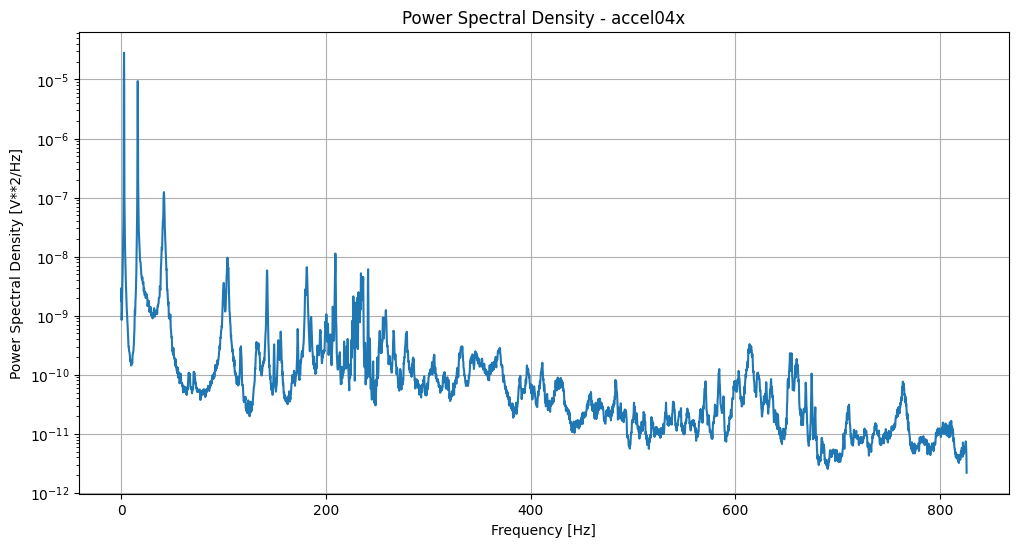

In [146]:
import h5py
from pathlib import Path
from config import settings
from scipy.signal import welch
import matplotlib.pyplot as plt
import mat73

# Define the path to the .mat file
file_path = Path(settings.path.raw) / '2020' / '08' / 'SHMTS_202008111416.mat'

def extract_timestamps(dataset, file):
    """Extract timestamps from the HDF5 dataset."""
    timestamps = []
    for ts in dataset:
        timestamps.append(matlab_datenum_to_datetime(ts[0]))
    return timestamps

def extract_references(dataset, file):
    """Extract referenced objects from the HDF5 dataset."""
    decoded_strings = []
    for ref in dataset:
        deref_obj = file[ref[0]]  # Dereference the object reference
        # Decode string if it's a byte array
        if isinstance(deref_obj, h5py.Dataset):
            decoded_strings.append(deref_obj[()].tobytes().decode('utf-16'))  # Decode as UTF-16 here
    return decoded_strings

# Clean up channel names by decoding UTF-16 and removing null characters
def clean_channel_name(name):
    return name.replace('\x00', '')  # Remove null characters

# Open the .mat file and extract channel names and data
with h5py.File(file_path, 'r') as f:
    dat_group = f['Dat']
    
    # First dereference the channel names
    channel_names_dataset = dat_group['ChannelNames'][()]
    channel_names = extract_references(channel_names_dataset, f)
    
    # Now clean the channel names
    cleaned_channel_names = [clean_channel_name(name) for name in channel_names]
    print(f"Cleaned Channel Names: {cleaned_channel_names}")
    
    # Load data
    data = dat_group['Data'][()]
    fs = dat_group['Fs'][()][0][0]  # Sampling frequency
    
    # Print data shape and sampling frequency
    print(f"Data shape: {data.shape}")
    print(f"Sampling Frequency: {fs} Hz")

# Use scipy.signal.welch to compute the power spectral density of one channel
channel_index = 6  # Example: using the 4th channel
f, Pxx = welch(data[channel_index], fs=fs, nperseg=fs*5)

# Plot the power spectral density
plt.figure(figsize=(12, 6))
plt.plot(f, Pxx)
plt.yscale('log')
plt.title(f"Power Spectral Density - {cleaned_channel_names[channel_index]}")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power Spectral Density [V**2/Hz]")
plt.grid(True)
plt.show()


In [164]:
import torch 
from torchaudio.transforms import Spectrogram

class Welch(torch.nn.Module):
    def __init__(self, fs, nperseg,fmax=None):
        super(Welch, self).__init__()
        self.fs = fs
        self.nperseg = nperseg
        self.fmax = fmax
        self.freq_line = torch.linspace(0., self.fs/2, self.nperseg//2+1)
        if self.fmax is None:
            self.freq_mask = torch.ones_like(self.freq_line, dtype=torch.bool)
        else:
            
            self.freq_mask = self.freq_line <= self.fmax
        self.freq_line_masked = self.freq_line[self.freq_mask]
        self.spectrogram = Spectrogram(n_fft=self.nperseg)
        
    def forward(self, x):
        if x.dim() == 1:
            x = x.unsqueeze(0)
        spectrogram_data = self.spectrogram(x) /(self.fs)**2
        psd = spectrogram_data.mean(-1)
        psd = psd[..., self.freq_mask]
        return psd
        

(0.0, 100.0)

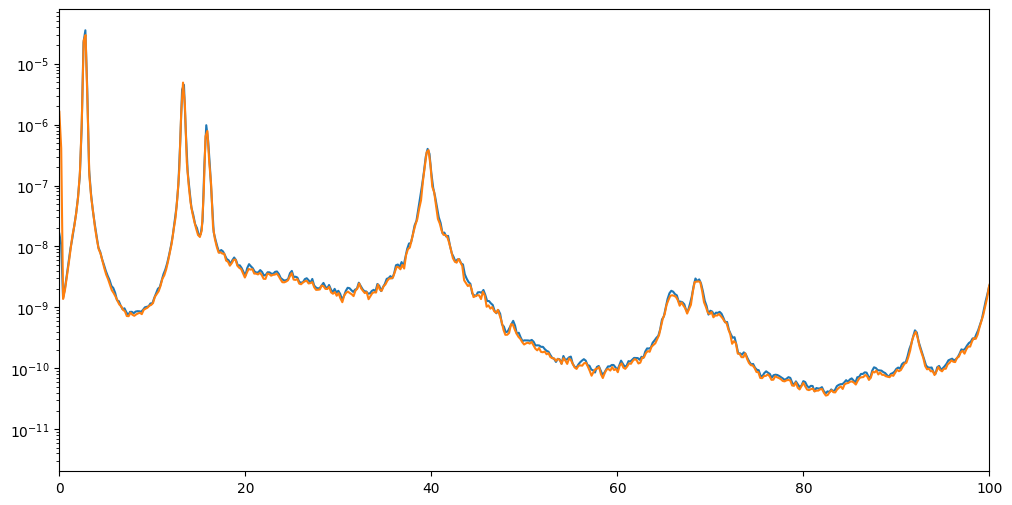

In [166]:
from scipy.signal import welch 
welch_torch = Welch(fs=float(fs), nperseg=8196)
psd = welch_torch(torch.tensor(data[3]))
f, Pxx = welch(data[3], fs=fs, nperseg=fs*5) 

plt.figure(figsize=(12, 6))
plt.plot(f, Pxx)
plt.plot(welch_torch.freq_line_masked, psd[0])
plt.yscale('log')
plt.xlim(0, 100)

In [118]:
file_path=file_path / 'SHMTS_202008111416.mat'

In [120]:
def get_date(file_path):
    """Extract the date from the file path."""
    file_name = file_path.stem.split('_')[-1]
    date = datetime.datetime.strptime(file_name, '%Y%m%d%H%M')
    return date
get_date(file_path)

datetime.datetime(2020, 8, 11, 14, 16)

In [167]:
path =Path(settings.path.raw) / "2020"/"11"/"listOfCorruptedFiles.mat"
from scipy.io import loadmat
data = loadmat(path)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec  2 03:34:14 2021',
 '__version__': '1.0',
 '__globals__': [],
 'listOfCorruptedFiles': array([[array(['SHMTS_202011121916.mat'], dtype='<U22')],
        [array(['listOfCorruptedFiles.mat'], dtype='<U24')]], dtype=object)}

In [117]:
file_path = Path(settings.path.raw) / '2020' / '08' 
list(file_path.iterdir())

[PosixPath('/media/owilab/EXTERNAL_USB/2020/08/listOfCorruptedFiles.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111416.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111426.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111436.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111446.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111456.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111506.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111516.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111526.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111536.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111546.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111556.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SHMTS_202008111606.mat'),
 PosixPath('/media/owilab/EXTERNAL_USB/2020/08/SH